In [1]:
import numpy as np
import sys

In [2]:
# 1. Models
from tgan_v2 import tgan

# 2. Data Loading
from data_loading import google_data_loading, sine_data_generation

# 3. Metrics
sys.path.append('metrics')
from discriminative_score_metrics_v2 import discriminative_score_metrics
from visualization_metrics import PCA_Analysis, tSNE_Analysis
from predictive_score_metrics_v2 import predictive_score_metrics

print('Finish importing necessary packages and functions')

Instructions for updating:
non-resource variables are not supported in the long term
Finish importing necessary packages and functions


In [3]:
# Data
data_set = ['google','sine']
data_name = data_set[0]

# Experiments iterations
Iteration = 2
Sub_Iteration = 3

In [4]:
seq_length = 24

if data_name == 'google':
    dataX = google_data_loading(seq_length)
elif data_name == 'sine':
    No = 10000
    F_No = 5
    dataX = sine_data_generation(No, seq_length, F_No)

print(data_name + ' dataset is ready.')

google dataset is ready.


In [5]:
parameters = dict()

parameters['hidden_dim'] = len(dataX[0][0,:]) * 4
parameters['num_layers'] = 3
parameters['iterations'] = 10000
parameters['batch_size'] = 128
parameters['module_name'] = 'gru'   # Other options: 'lstm' or 'lstmLN'
parameters['z_dim'] = len(dataX[0][0,:])

print('Parameters are ' + str(parameters))

Parameters are {'hidden_dim': 24, 'num_layers': 3, 'iterations': 10000, 'batch_size': 128, 'module_name': 'gru', 'z_dim': 6}


In [6]:
# Output Initialization
Discriminative_Score = list()
Predictive_Score = list()

print('Start iterations')

# Each Iteration
for it in range(Iteration):


    # Synthetic Data Generation
    dataX_hat = tgan(dataX, parameters)

    print('Finish Synthetic Data Generation')

    """#%% Performance Metrics

    # 1. Discriminative Score
    Acc = list()
    for tt in range(Sub_Iteration):
        Temp_Disc = discriminative_score_metrics (dataX, dataX_hat)
        Acc.append(Temp_Disc)

    Discriminative_Score.append(np.mean(Acc))

    # 2. Predictive Performance
    MAE_All = list()
    for tt in range(Sub_Iteration):
        MAE_All.append(predictive_score_metrics (dataX, dataX_hat))

    Predictive_Score.append(np.mean(MAE_All))"""

print('Finish TGAN iterations')

Start iterations
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


D:\Users\NINGMEI\Anaconda3\lib\site-packages\tensorflow\python\keras\layers\legacy_rnn\rnn_cell_impl.py:529: UserWarning: `tf.nn.rnn_cell.GRUCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.GRUCell`, and will be replaced by that in Tensorflow 2.0.
  warnings.warn("`tf.nn.rnn_cell.GRUCell` is deprecated and will be removed "
D:\Users\NINGMEI\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '
D:\Users\NINGMEI\Anaconda3\lib\site-packages\tensorflow\python\keras\legacy_tf_layers\core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
D:\Users\NINGMEI\Anaconda3\lib\site-packa

Start Embedding Network Training
step: 0, e_loss: 0.324
step: 1000, e_loss: 0.02
step: 2000, e_loss: 0.0129
step: 3000, e_loss: 0.0084
step: 4000, e_loss: 0.0085
step: 5000, e_loss: 0.0063
step: 6000, e_loss: 0.0046
step: 7000, e_loss: 0.0039
step: 8000, e_loss: 0.0063
step: 9000, e_loss: 0.0031
Finish Embedding Network Training
Start Training with Supervised Loss Only
step: 0, s_loss: 0.2061
step: 1000, s_loss: 0.0128
step: 2000, s_loss: 0.0066
step: 3000, s_loss: 0.0049
step: 4000, s_loss: 0.0041
step: 5000, s_loss: 0.0034
step: 6000, s_loss: 0.003
step: 7000, s_loss: 0.0029
step: 8000, s_loss: 0.0025
step: 9000, s_loss: 0.0023
Finish Training with Supervised Loss Only
Start Joint Training
step: 0, d_loss: 1.9614, g_loss_u: 0.9215, g_loss_s: 0.0223, g_loss_v: 0.2835, e_loss_t0: 0.0574
step: 1000, d_loss: 1.5749, g_loss_u: 1.4687, g_loss_s: 0.0089, g_loss_v: 0.0511, e_loss_t0: 0.0037
step: 2000, d_loss: 1.7177, g_loss_u: 1.0555, g_loss_s: 0.0142, g_loss_v: 0.0271, e_loss_t0: 0.003
ste

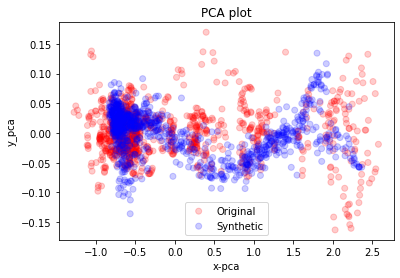

In [7]:
PCA_Analysis (dataX, dataX_hat)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.075s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.034199
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.722252
[t-SNE] KL divergence after 300 iterations: 0.846686


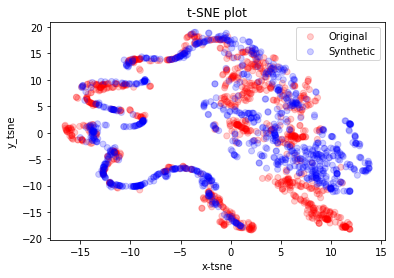

In [8]:
tSNE_Analysis (dataX, dataX_hat)

In [ ]:
# Print Results
print('Discriminative Score - Mean: ' + str(np.round(np.mean(Discriminative_Score),4)) + ', Std: ' + str(np.round(np.std(Discriminative_Score),4)))
print('Predictive Score - Mean: ' + str(np.round(np.mean(Predictive_Score),4)) + ', Std: ' + str(np.round(np.std(Predictive_Score),4)))

In [8]:
Acc = list()
for tt in range(Sub_Iteration):
    Temp_Disc = discriminative_score_metrics (dataX, dataX_hat)
    Acc.append(Temp_Disc)

Discriminative_Score.append(np.mean(Acc))

# 2. Predictive Performance
MAE_All = list()
for tt in range(Sub_Iteration):
    MAE_All.append(predictive_score_metrics (dataX, dataX_hat))

Predictive_Score.append(np.mean(MAE_All))

AttributeError: module 'tensorflow' has no attribute 'reset_default_graph'

In [9]:
np.save('X_hat_12-29.npy', dataX_hat)
np.save('X.npy_12-29', dataX)

In [18]:
len(dataX[0])

24